# Part A

In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B
import seaborn as sns
import os
import numpy as np
os.getcwd()
os.chdir('C:\\Users\\1809s\\OneDrive\\Desktop')
import pandas as pd
df1=pd.read_csv("CE802_P2_Data.csv")

# Removing the column F21 which has missing value
df2=df1.dropna(axis=1,how="any")

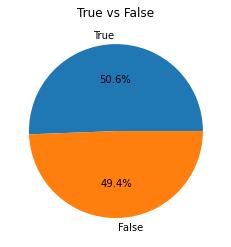

In [2]:
import matplotlib.pyplot as plt


true_count = sum(df1["Class"] == 1)
false_count= sum(df1["Class"]== 0)

# Create a list of the counts
counts = [true_count, false_count]

# Create a list of the labels
labels = ['True', 'False']

# Create a pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('True vs False')

# Show the chart
plt.show()


In [3]:
#Features
X=df2.drop(['Class'],axis=1)
Y=df1['Class'] 

C:\Users\1809s\AppData\Local\Temp\ipykernel_16976\2365069044.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_all, dtype = np.bool)


<AxesSubplot:>

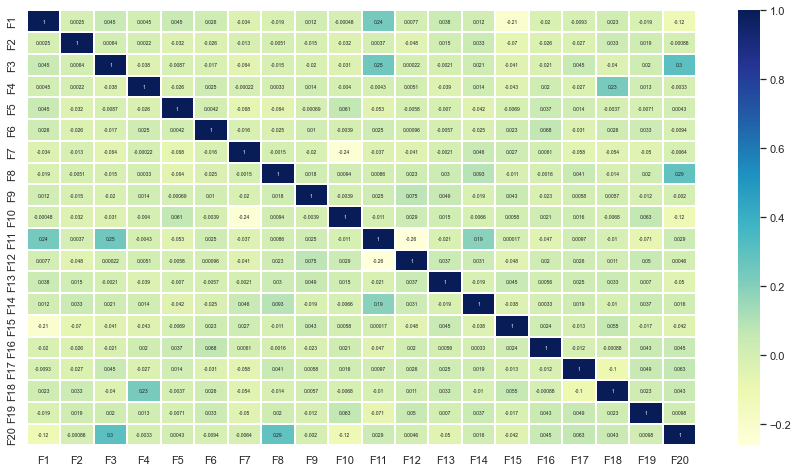

In [4]:
sns.set_theme()
corr_all = X.corr()
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.gcf().set_size_inches(15, 8)

sns.heatmap(corr_all, cmap="YlGnBu", annot=True, annot_kws={'size': 5},linewidths=.3)

# Implementing decision tree

In [5]:
# Load libraries
#Decision tree is unaffected having by non-normalized or non-standardized data
import numpy as np
import math
from sklearn import tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



#Splitting the dataset to training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test


modeltree=tree.DecisionTreeClassifier()
#Fitting the decision tree on our training and test data 
modeltree=modeltree.fit(X_train,Y_train)
#generating the decisions
prediction=modeltree.predict(X_test)

#Calculating the accuracy and precision
Accuracy=metrics.accuracy_score(Y_test, prediction)
print("Accuracy of this model is : {:.2%} ".format(Accuracy), "Which is:",Accuracy)


confmat=metrics.precision_score(Y_test,prediction)
print("Precision of the model is:{:.2%} ".format(confmat),"Which is:",confmat)

Accuracy of this model is : 84.33%  Which is: 0.8433333333333334
Precision of the model is:83.33%  Which is: 0.8333333333333334


# Implying Knn model on the dataset and determining the accuracy just by deleting the missing feature

In [6]:
#Implying Knn model on the dataset and determining the accuracy
#Knn needs to have standardized data as it works with the euclidean distance 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
model=StandardScaler()
X_train=model.fit_transform(X_train)
X_test=model.fit_transform(X_test)
math.sqrt(len(Y_test))


17.320508075688775

In [7]:
math.sqrt(len(Y_test)) # We are going to choose the k value which has to be 
#a odd number or the sqrt of the length of test output

classifier=KNeighborsClassifier(n_neighbors=17,p=2,metric='euclidean')
classifier.fit(X_train,Y_train)
prediction=classifier.predict(X_test)

#Calculating the accuracy
Accuracy=metrics.accuracy_score(Y_test, prediction)
print("Accuracy of this model is : {:.2%} ".format(Accuracy), "Which is:",Accuracy)

confmat=metrics.precision_score(Y_test,prediction)
print("Precision of the model is:{:.2%} ".format(confmat),"Which is:",confmat)


Accuracy of this model is : 63.33%  Which is: 0.6333333333333333
Precision of the model is:62.94%  Which is: 0.6293706293706294


# Implying  SVM model on the dataset and determining the accuracy just by deleting the missing feature

In [8]:
#Using Linear kernel 
#SVM does needs Standardization too and it is worked on the standardized Train and test datasets as it deals with the distance
#between hyperplane and margin data points


from sklearn.svm import SVC



svm_class=SVC(kernel='linear',random_state=0)
svm_class.fit(X_train,Y_train)
prediction=svm_class.predict(X_test)

Accuracy=metrics.accuracy_score(Y_test, prediction)
print("Accuracy of this model is : {:.2%} ".format(Accuracy), "Which is:",Accuracy)

confmat=metrics.precision_score(Y_test,prediction)
print("Precision of the model is:{:.2%} ".format(confmat),"Which is:",confmat)

Accuracy of this model is : 63.67%  Which is: 0.6366666666666667
Precision of the model is:63.57%  Which is: 0.6357142857142857


In [9]:
#using rbf kernel

svm_class=SVC(kernel='rbf',random_state=0)
svm_class.fit(X_train,Y_train)
prediction=svm_class.predict(X_test)
Accuracy=metrics.accuracy_score(Y_test, prediction)
print("Accuracy of this model is : {:.2%} ".format(Accuracy), "Which is:",Accuracy)

confmat=metrics.precision_score(Y_test,prediction)
print("Precision of the model is:{:.2%} ".format(confmat),"Which is:",confmat)

Accuracy of this model is : 67.67%  Which is: 0.6766666666666666
Precision of the model is:67.12%  Which is: 0.6712328767123288


# Performing imputation and implementing the methods once again

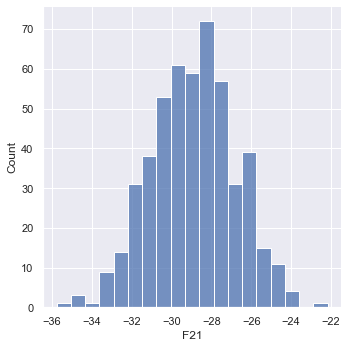

In [10]:


sns.displot(df1.F21) #Since the column follows normal distribution , we perform mean imputation

In [11]:
df1['F21'] = df1['F21'].fillna(df1['F21'].mean())
df1['F21'] 

0     -29.26000
1     -29.24000
2     -28.90704
3     -27.18000
4     -27.20000
         ...   
995   -28.90704
996   -29.94000
997   -27.72000
998   -28.90704
999   -25.90000
Name: F21, Length: 1000, dtype: float64

# Implementing DT on imputed dataset

In [12]:
#Features
X=df1.drop(['Class'],axis=1)
Y=df1['Class'] 

#Splitting the dataset to training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test


modeltree=tree.DecisionTreeClassifier() 
modeltree=modeltree.fit(X_train,Y_train)
prediction=modeltree.predict(X_test)

Accuracy=metrics.accuracy_score(Y_test, prediction)
print("Accuracy of this model is : {:.2%} ".format(Accuracy), "Which is:",Accuracy)

confmat=metrics.precision_score(Y_test,prediction)
print("Precision of the model is:{:.2%} ".format(confmat),"Which is:",confmat)

DT_Accuracy=Accuracy
DT_Precision=confmat

Accuracy of this model is : 82.00%  Which is: 0.82
Precision of the model is:81.63%  Which is: 0.8163265306122449


# Implying Knn model on the dataset and determining the accuracy just by deleting the missing feature

In [13]:
from sklearn.preprocessing import StandardScaler
model=StandardScaler()
X_train=model.fit_transform(X_train)
X_test=model.fit_transform(X_test)

classifier=KNeighborsClassifier(n_neighbors=17,p=2,metric='euclidean')
classifier.fit(X_train,Y_train)
prediction=classifier.predict(X_test)

#Calculating the accuracy
Accuracy=metrics.accuracy_score(Y_test, prediction)
print("Accuracy of this model is : {:.2%} ".format(Accuracy), "Which is:",Accuracy)

confmat=metrics.precision_score(Y_test,prediction)
print("Precision of the model is:{:.2%} ".format(confmat),"Which is:",confmat)

KNN_Accuracy=Accuracy
KNN_Precision=confmat

Accuracy of this model is : 68.33%  Which is: 0.6833333333333333
Precision of the model is:71.31%  Which is: 0.7131147540983607


# Implying SVM on the imputed dataset

In [14]:
#Using Linear kernel 

from sklearn.svm import SVC

svm_class=SVC(kernel='linear',random_state=0)
svm_class.fit(X_train,Y_train)
prediction=svm_class.predict(X_test)

Accuracy=metrics.accuracy_score(Y_test, prediction)
print("Accuracy of this model is : {:.2%} ".format(Accuracy), "Which is:",Accuracy)

confmat=metrics.precision_score(Y_test,prediction)
print("Precision of the model is:{:.2%} ".format(confmat),"Which is:",confmat)

Accuracy of this model is : 69.33%  Which is: 0.6933333333333334
Precision of the model is:69.50%  Which is: 0.6950354609929078


In [15]:
#using rbf kernel

svm_class=SVC(kernel='rbf',random_state=0)
svm_class.fit(X_train,Y_train)
prediction=svm_class.predict(X_test)
Accuracy=metrics.accuracy_score(Y_test, prediction)
print("Accuracy of this model is : {:.2%} ".format(Accuracy), "Which is:",Accuracy)

confmat=metrics.precision_score(Y_test,prediction)
print("Precision of the model is:{:.2%} ".format(confmat),"Which is:",confmat)

SVM_Accuracy=Accuracy
SVM_Precision=confmat

Accuracy of this model is : 70.67%  Which is: 0.7066666666666667
Precision of the model is:69.03%  Which is: 0.6903225806451613


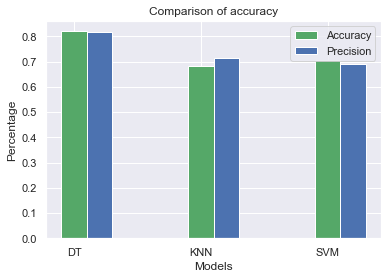

In [16]:
#Visually representing the Performance of each model


import matplotlib.pyplot as plt

data1 = [DT_Accuracy,KNN_Accuracy,SVM_Accuracy]
data2 = [DT_Precision,KNN_Precision,SVM_Precision]
X = ["DT","KNN","SVM"]
X_axis = np.arange(len(X))
plt.xticks(X_axis, X)


width =0.2
bar1=plt.bar(np.arange(len(data1)), data1, width=width,color = 'g')
bar2=plt.bar(np.arange(len(data2))+ width, data2, width=width)

plt.title("Comparison of accuracy")
plt.ylabel('Percentage')

plt.xlabel("Models")
plt.legend((bar1,bar2),('Accuracy','Precision'))
plt.show()

In [17]:
#Since Decision Tree has out performed, let's look into the learning curve for all the models

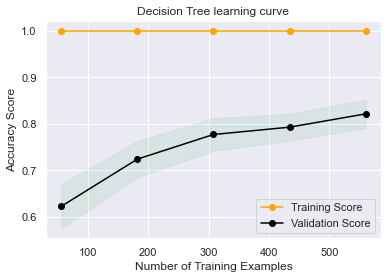

In [18]:
from sklearn.model_selection import learning_curve
# Generating the learning curve
train_sizes, train_scores, val_scores = learning_curve(modeltree, X_train, Y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)
#plotting the curve
plt.plot(train_sizes, train_mean, 'o-', color='orange', label='Training Score')
plt.plot(train_sizes, val_mean, 'o-', color='black', label='Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy Score')
plt.legend()
plt.title("Decision Tree learning curve")
plt.show()



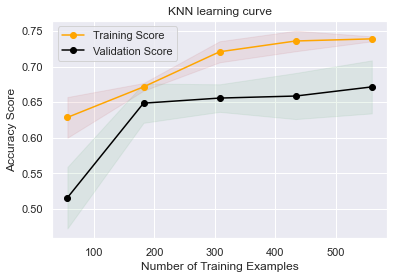

In [19]:
train_sizes, train_scores, val_scores = learning_curve(classifier, X_train, Y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)
#plotting the curve
plt.plot(train_sizes, train_mean, 'o-', color='orange', label='Training Score')
plt.plot(train_sizes, val_mean, 'o-', color='black', label='Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy Score')
plt.legend()
plt.title("KNN learning curve")
plt.show()

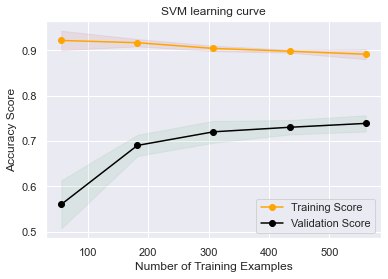

In [20]:
train_sizes, train_scores, val_scores = learning_curve(svm_class, X_train, Y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)
#plotting the curve
plt.plot(train_sizes, train_mean, 'o-', color='orange', label='Training Score')
plt.plot(train_sizes, val_mean, 'o-', color='black', label='Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy Score')
plt.legend()
plt.title("SVM learning curve")
plt.show()

# Part B

In [21]:
test_df = pd.read_csv('CE802_P2_Test.csv')
test_data = test_df.iloc[:,:-1].copy()

In [22]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,8197.290,1.72,7891.36,10.5620,-4.53990,0,-11.0406,-12.4440,-46.680,-2585.96,...,1.53520,-15.2229,-44625.312,8.41440,0.5220,17.8269,3490.58,0,4384.230,NaN
1,14538.990,0.72,7499.68,7.2722,-4.78200,1,-11.4459,-17.1720,-39.340,-4081.96,...,2.76840,-16.4400,-44620.413,9.05720,13.1320,17.1897,2369.52,1,3717.980,NaN
2,13826.490,0.72,8083.36,10.0380,-8.37000,0,-17.2530,-17.2080,-47.600,-2993.04,...,1.25344,-13.7910,-44600.720,9.84300,43.5000,16.7982,3262.72,0,3754.710,NaN
3,11627.790,1.72,7770.58,9.2460,-4.50810,0,-11.9301,-16.9590,-45.445,-3973.96,...,1.81800,-15.4131,-44613.167,8.69800,28.1060,16.9833,3390.80,1,3916.230,NaN
4,13140.090,1.72,6954.96,7.8252,-6.61020,0,-12.5493,-10.9881,-47.000,-3001.92,...,1.93120,-13.6899,-44702.260,11.74600,17.7608,19.5120,3592.62,1,2224.930,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12669.384,1.72,7342.76,8.4580,-7.23600,0,-11.3766,-13.0998,-50.840,-2659.16,...,1.90380,-14.9709,-44604.640,10.67600,16.6780,17.1006,3468.60,0,3740.048,NaN
996,20842.290,0.72,7653.42,7.2880,-6.28860,0,-11.1843,-12.9705,-39.339,-2886.62,...,3.15400,-16.9860,-44596.160,8.29354,23.6920,18.6708,3285.22,1,3856.030,NaN
997,14606.190,0.72,7618.98,7.6318,-12.35700,0,-12.7812,-14.7900,-41.421,-3265.76,...,2.85120,-18.0270,-44612.900,8.70180,19.6950,17.3406,2862.92,1,3797.100,-31.94
998,13836.690,1.72,7253.56,9.0120,-4.30509,1,-17.1600,-16.0170,-36.287,-3012.48,...,1.54020,-13.9959,-44618.622,9.72200,18.3272,16.9140,3095.02,1,3653.220,-28.56


In [23]:
test_data['F21'] = test_data['F21'].fillna(test_data['F21'].mean())
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,8197.290,1.72,7891.36,10.5620,-4.53990,0,-11.0406,-12.4440,-46.680,-2585.96,...,1.53520,-15.2229,-44625.312,8.41440,0.5220,17.8269,3490.58,0,4384.230,-28.93276
1,14538.990,0.72,7499.68,7.2722,-4.78200,1,-11.4459,-17.1720,-39.340,-4081.96,...,2.76840,-16.4400,-44620.413,9.05720,13.1320,17.1897,2369.52,1,3717.980,-28.93276
2,13826.490,0.72,8083.36,10.0380,-8.37000,0,-17.2530,-17.2080,-47.600,-2993.04,...,1.25344,-13.7910,-44600.720,9.84300,43.5000,16.7982,3262.72,0,3754.710,-28.93276
3,11627.790,1.72,7770.58,9.2460,-4.50810,0,-11.9301,-16.9590,-45.445,-3973.96,...,1.81800,-15.4131,-44613.167,8.69800,28.1060,16.9833,3390.80,1,3916.230,-28.93276
4,13140.090,1.72,6954.96,7.8252,-6.61020,0,-12.5493,-10.9881,-47.000,-3001.92,...,1.93120,-13.6899,-44702.260,11.74600,17.7608,19.5120,3592.62,1,2224.930,-28.93276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12669.384,1.72,7342.76,8.4580,-7.23600,0,-11.3766,-13.0998,-50.840,-2659.16,...,1.90380,-14.9709,-44604.640,10.67600,16.6780,17.1006,3468.60,0,3740.048,-28.93276
996,20842.290,0.72,7653.42,7.2880,-6.28860,0,-11.1843,-12.9705,-39.339,-2886.62,...,3.15400,-16.9860,-44596.160,8.29354,23.6920,18.6708,3285.22,1,3856.030,-28.93276
997,14606.190,0.72,7618.98,7.6318,-12.35700,0,-12.7812,-14.7900,-41.421,-3265.76,...,2.85120,-18.0270,-44612.900,8.70180,19.6950,17.3406,2862.92,1,3797.100,-31.94000
998,13836.690,1.72,7253.56,9.0120,-4.30509,1,-17.1600,-16.0170,-36.287,-3012.48,...,1.54020,-13.9959,-44618.622,9.72200,18.3272,16.9140,3095.02,1,3653.220,-28.56000


In [24]:

predicted=modeltree.predict(test_data)
test_df.iloc[:,-1] = predicted



test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])

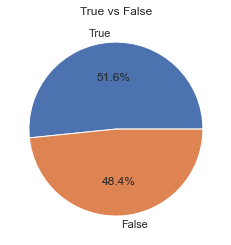

In [25]:
true_count = sum(test_df["Class"] == 1)
false_coun = sum(test_df["Class"]== 0)

# Create a list of the counts
counts = [true_count, false_count]

# Create a list of the labels
labels = ['True', 'False']

# Create a pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('True vs False')

# Show the chart
plt.show()